In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
PLOTSDIR="/data1/s1620444/plots"
RESULTSDIR="/data1/s1620444/results"

In [169]:

# df=pd.read_csv(f"{RESULTSDIR}/test_scores_per_img_sample.csv",header=0,quotechar='"',sep=',')
# df
import re
df=pd.DataFrame(columns=["model","dataset","psnr","ssim"])
method_dict={"rcan":"RCAN","wdsr":"WDSR","autosr":"AutoSR-RS","autosrcnn":"AutoSRCNN"}
ds_dict={"cerrado":"Cerrado","oli2msi":"OLI2MSI","sent_nicfi":"SENT-NICFI","sr_ucmerced":"UC Merced"}

with open(f"{RESULTSDIR}/test_scores_per_img_sample.csv","r") as f:
    lines=f.readlines()[1:]
    for line in lines:
        line=line.split(sep=",")
        method=line[0]
        dataset=line[1]
        print(method,dataset)
        for i in range(100):
            if line[2+i] == "NaN":
                psnr=float("NaN")
            else:
                psnr=float(re.sub("[^0-9\.]", "", line[2+i]))
            df=df.append({"model":method_dict[method],"dataset":ds_dict[dataset], "psnr":psnr ,"ssim":float(re.sub("[^0-9\.]", "", line[102+i]))},ignore_index=True)


autosr oli2msi
autosr sent_nicfi
wdsr cerrado
wdsr sr_ucmerced
wdsr oli2msi
wdsr sent_nicfi
rcan cerrado
rcan sr_ucmerced
rcan oli2msi
rcan sent_nicfi
autosr sr_ucmerced
autosrcnn sent_nicfi
autosrcnn oli2msi
autosrcnn sr_ucmerced
autosr cerrado
autosrcnn cerrado


In [170]:
df=df.dropna()

In [171]:
df_test=pd.pivot_table(df,index=["model","dataset"], columns=df.groupby(['model','dataset']).cumcount().add(1),values=['psnr','ssim'],aggfunc='sum').reset_index()

In [172]:
df_test=df_test.set_index("model")

In [123]:
df_test.loc[df_test.dataset=="OLI2MSI"].psnr

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
model,,,,,,,,,,,,,,,,,,,,,
AutoSR-RS,44.489536,50.555233,49.363033,49.128950,46.253063,47.701410,44.174534,43.428500,46.672640,44.721080,...,45.696327,41.844240,47.803660,46.150566,41.084885,44.657658,47.549503,45.842930,42.439083,45.577305
AutoSRCNN,43.769115,50.029957,48.654670,48.190872,45.392982,46.790802,43.095608,42.775238,45.105553,43.729782,...,44.347320,40.584450,46.683163,44.945114,40.518745,44.227356,46.215380,45.130524,42.098720,44.540333
RCAN,44.232490,50.434216,49.286370,48.813090,46.086170,47.309680,43.782550,43.251520,45.990868,44.203110,...,45.048527,41.293156,47.332073,45.774690,40.863180,44.497524,46.575400,45.706140,42.293262,45.255230
WDSR,43.808006,50.068550,48.851532,48.332973,45.479090,46.986874,43.388252,42.906918,45.307045,43.802723,...,44.443024,40.709156,46.961010,45.160957,40.530975,44.234370,46.317720,45.272446,42.160057,44.717590


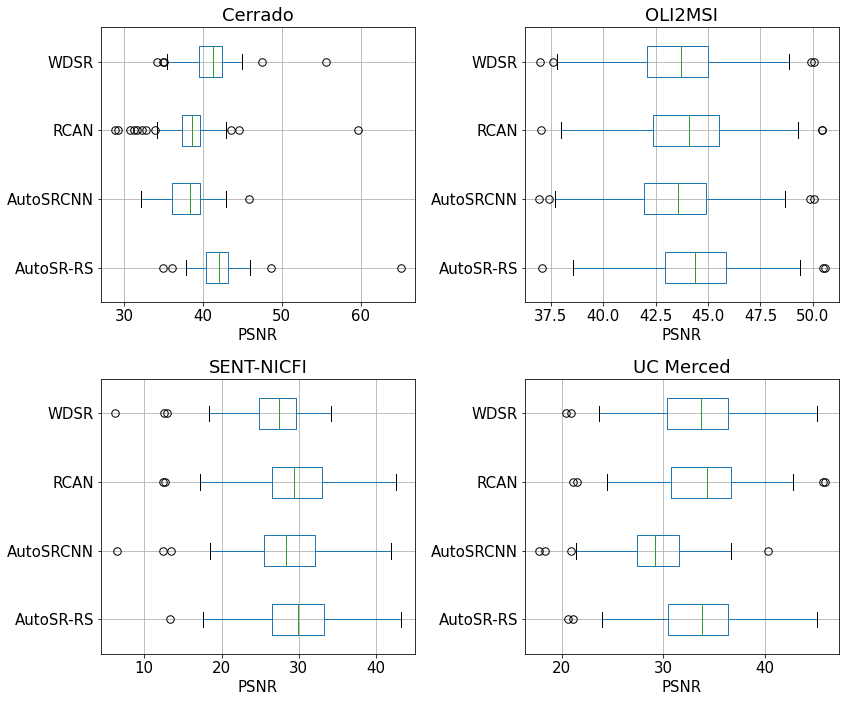

In [175]:
plt.rcParams.update({'font.size': 15})

fig,ax=plt.subplots(2,2,figsize=(12,10))
datasets=list(ds_dict.values())

for i,ax in enumerate(ax.flat):
    df_dataset=df_test.loc[df_test.dataset==datasets[i]]
    df_dataset.psnr.T.boxplot(vert=False, ax=ax,flierprops={"marker":'.',"markersize":15})
    ax.set_title(datasets[i])
    ax.set_xlabel("PSNR")

plt.tight_layout()
plt.savefig(f"{PLOTSDIR}/psnr_test_boxplot.pdf")
plt.show()

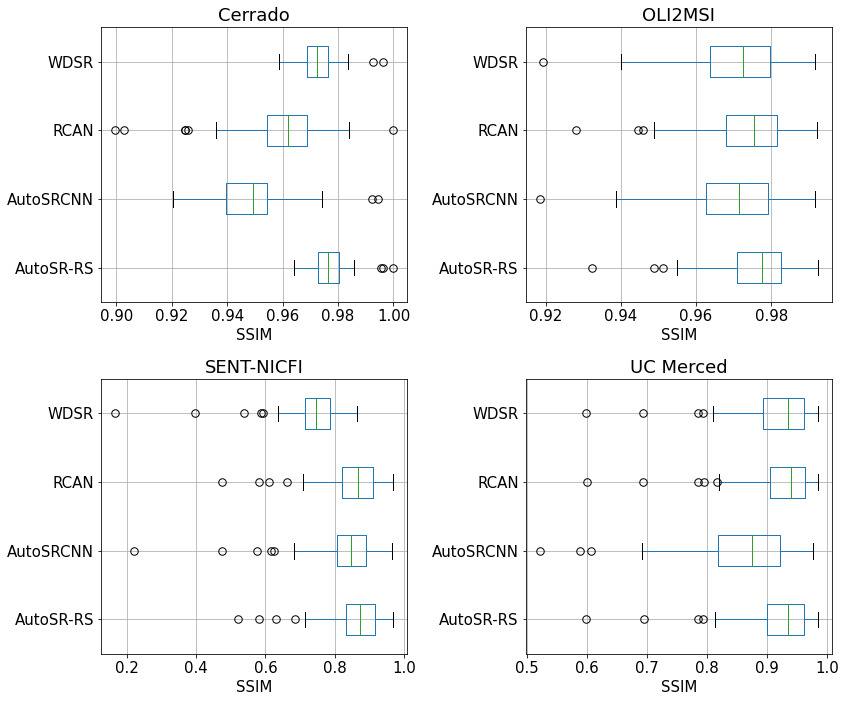

In [176]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
datasets=list(ds_dict.values())

for i,ax in enumerate(ax.flat):
    df_dataset=df_test.loc[df_test.dataset==datasets[i]]
    df_dataset.ssim.T.boxplot(vert=False, ax=ax,flierprops={"marker":'.',"markersize":15})
    ax.set_title(datasets[i])
    ax.set_xlabel("SSIM")

plt.tight_layout()
plt.savefig(f"{PLOTSDIR}/ssim_test_boxplot.pdf")
plt.show()